## Where do people hangout at Changi Airport?
![Changi Airport][changi]


1. Since I'm putting together a generic benchmarking tool for the evaluation of a development project at work ...
2. A buddy of mine does research work in retail sector esp for airports, so lets see if I can adapt this tool for the airport retail industry.
3. Thus the research question above , lets see if we can derive some interesting insights!
4. In the context of planning and urban design , through the analysis of space use patterns I hope to share some (retail) planning principles.

[changi]: https://wykeith.github.io/images/changi-layout.jpg

### Fetch Foursquare location links

1. Starting at Changi Airport as seed venue
2. Fetching the 5 next venues
3. For each of the 5 venues fetch the 5 next venues
4. Repeat until saturation (no new locations)

In [2]:
# bbox = [103.6182, 1.1158, 104.4085, 1.4706] # Bounding box for Singapore
bbox = [103.975796, 1.341720, 104.000917, 1.365318] # Bounding box for Changi Airport Terminals

In [3]:
new_crawl = [] # list of locations to be crawled
done = [] # list of crawled locations
links = [] # list of tuples that represent links between locations
venues = pd.DataFrame() # dictionary of locations id => meta-data on location

Set seed values for Changi Airport and T1,T2,T3
Depth is the number of recursive crawling processes.

In [73]:
#,"4b0bd124f964a520e03323e3" : Changi Airport
#,"4b1baa6bf964a52087fc23e3" : Terminal 1
#,"4b1b9ec2f964a52041fc23e3" : Terminal 2
#,"4b1baa07f964a52084fc23e3" : Terminal 3

to_crawl = ["4b0bd124f964a520e03323e3","4b1baa6bf964a52087fc23e3","4b1b9ec2f964a52041fc23e3","4b1baa07f964a52084fc23e3"]
depth = 8

In [5]:
for i in range(depth):
    new_crawl = []
    print("Step " + str(i) + ": " + str(len(venues)) + " locations and " + str(len(links)) + " links. " + str(len(to_crawl)) + " venues to go.")
    for v in to_crawl:
        if v not in venues:
            res = client.venues(v)
            venues = venues.append(pd.DataFrame({"name":res["venue"]["name"],"users":res["venue"]["stats"]["usersCount"],
            "checkins":res["venue"]["stats"]["checkinsCount"], "lat":res["venue"]["location"]["lat"], 
            "lng":res["venue"]["location"]["lng"],"cat":res["venue"]["categories"][0]["shortName"]}, index=[v]))
        next_venues = client.venues.nextvenues(v)
        for nv in next_venues['nextVenues']['items']:
            if ((nv["location"]["lat"] > bbox[1]) & (nv["location"]["lat"] < bbox[3]) & 
                (nv["location"]["lng"] > bbox[0]) & (nv["location"]["lng"] < bbox[2])):
                if nv["id"] not in venues:
                    venues = venues.append(pd.DataFrame({"name":nv["name"],"users":nv["stats"]["usersCount"],
                    "checkins":nv["stats"]["checkinsCount"], "lat":nv["location"]["lat"], 
                    "lng":nv["location"]["lng"],"cat":nv["categories"][0]["shortName"]}, index=[nv["id"]]))
                if (nv["id"] not in done) & (nv["id"] not in to_crawl) & (nv["id"] not in new_crawl):
                    new_crawl.append(nv["id"])
                links.append((v, nv["id"]))
        done.append(v)
    to_crawl = new_crawl

Step 0: 0 locations and 0 links. 4 venues to go.
Step 1: 21 locations and 17 links. 15 venues to go.
Step 2: 90 locations and 71 links. 10 venues to go.
Step 3: 133 locations and 104 links. 9 venues to go.
Step 4: 166 locations and 128 links. 10 venues to go.
Step 5: 203 locations and 155 links. 9 venues to go.
Step 6: 238 locations and 181 links. 7 venues to go.
Step 7: 259 locations and 195 links. 9 venues to go.


In [13]:
venues = venues.reset_index().drop_duplicates(subset='index',keep='last').set_index('index')
print('List of unique names:'+'%s' % ','.join([" \'"+str(x)+"\'" for x in venues.sort_values(by='cat').cat.unique()]))
venues.head()

List of unique names: 'Airport', 'American', 'Bakery', 'Bar', 'Bookstore', 'Bubble Tea', 'Burgers', 'Café', 'Candy Store', 'Cineplex', 'Coffee Shop', 'Cosmetics', 'Department Store', 'Donuts', 'Fast Food', 'Food Court', 'Garden', 'Gift Shop', 'Hong Kong', 'Hotel Bar', 'Indonesian', 'Italian', 'Japanese', 'Malay', 'Movie Theater', 'Museum', 'Music Venue', 'Other Outdoors', 'Pizza', 'Pub', 'Ramen', 'Restaurant', 'Sandwiches', 'Seafood', 'Shoes', 'Smoke Shop', 'Sports Bar', 'Steakhouse', 'Sushi', 'Terminal', 'Wine Bar', 'Wings'


,cat,checkins,lat,lng,name,users
index,,,,,,
4b0bd124f964a520e03323e3,Airport,706121,1.356443,103.988897,Singapore Changi Airport (SIN) (Singapore Chan...,305444
4b1baa6bf964a52087fc23e3,Terminal,239042,1.362005,103.990037,Terminal 1,113777
4b1b9ec2f964a52041fc23e3,Terminal,214919,1.354803,103.989327,Terminal 2,87246
4b1baa07f964a52084fc23e3,Terminal,226441,1.357019,103.986885,Terminal 3,87251
4d33ba0c6c7c721e8f27bc56,Japanese,3457,1.361223,103.990042,Saboten 勝博殿,2347


In [19]:
# Drop the original seed nodes
filterlist= ['American', 'Bakery', 'Bar', 'Bookstore', 'Bubble Tea', 'Burgers', 
             'Café', 'Candy Store', 'Cineplex', 'Coffee Shop', 'Cosmetics', 'Department Store', 'Donuts', 
             'Fast Food', 'Food Court', 'Garden', 'Gift Shop', 'Hong Kong', 'Hotel Bar', 'Indonesian', 'Italian', 
             'Japanese', 'Malay', 'Movie Theater', 'Museum', 'Music Venue', 'Other Outdoors', 'Pizza', 'Pub', 
             'Ramen', 'Restaurant', 'Sandwiches', 'Seafood', 'Shoes', 'Smoke Shop', 'Sports Bar', 'Steakhouse', 
             'Sushi', 'Wine Bar', 'Wings']

In [20]:
labels = venues["name"].to_dict()

## Generating the network

We build the network out of our crawled venues (= nodes) and links between them.

In [21]:
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(venues.index)
for f,t in links:
    G.add_edge(f, t)

In [22]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 80
Number of edges: 212
Average in degree:   2.6500
Average out degree:   2.6500


Calculate some useful metrics and visualize the most important venues

In [23]:
pagerank = nx.pagerank(G,alpha=0.9)
betweenness = nx.betweenness_centrality(G)

venues['pagerank'] = [pagerank[n] for n in venues.index]
venues['betweenness'] = [betweenness[n] for n in venues.index]

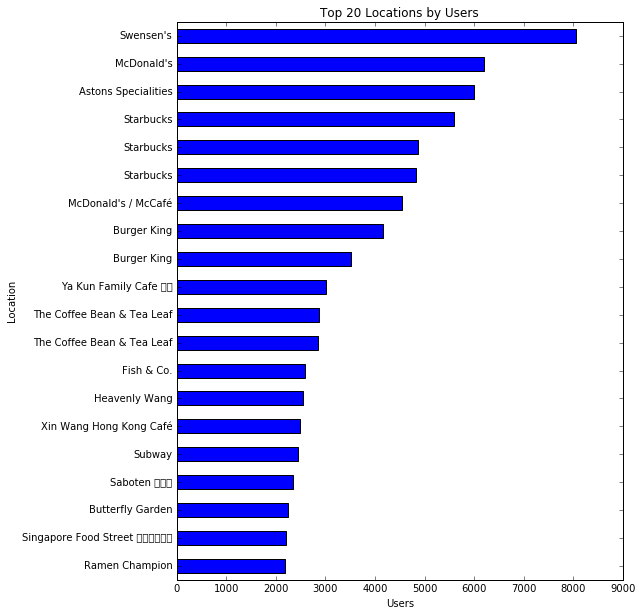

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 10), dpi=150)
ax = fig.add_subplot(111)
venues.sort_values(by='users', inplace=True)
#venues.set_index('name')[-20:].users.plot(kind='barh')
venues[venues['cat'].isin(filterlist)].set_index('name')[-20:].users.plot(kind='barh')
ax.set_ylabel('Location')
ax.set_xlabel('Users')
ax.set_title('Top 20 Locations by Users')
plt.show()

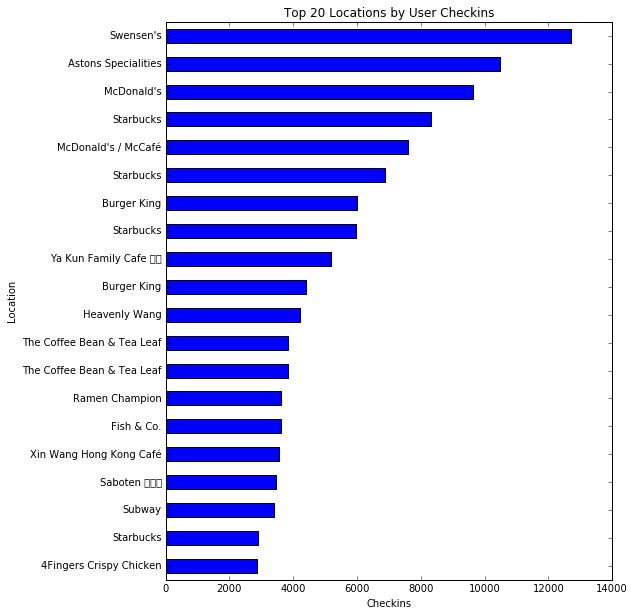

In [28]:
fig = plt.figure(figsize=(8, 10), dpi=150)
ax = fig.add_subplot(111)
venues.sort_values(by='checkins', inplace=True)
#venues.set_index('name')[-20:].checkins.plot(kind='barh')
venues[venues['cat'].isin(filterlist)].set_index('name')[-20:].checkins.plot(kind='barh')
ax.set_ylabel('Location')
ax.set_xlabel('Checkins')
ax.set_title('Top 20 Locations by User Checkins')
plt.show()

PageRank has been used to rank spaces or streets to predict how many people (pedestrians or vehicles) come to the individual spaces or streets. The networks of urban spaces in London, for instance, have up to 20,000 nodes and 100,000 links. In these networks, weighted PageRank best predicts human mobility in a case study of movement within London. Individuals and businesses are likely to colocate in places with high connectivity.

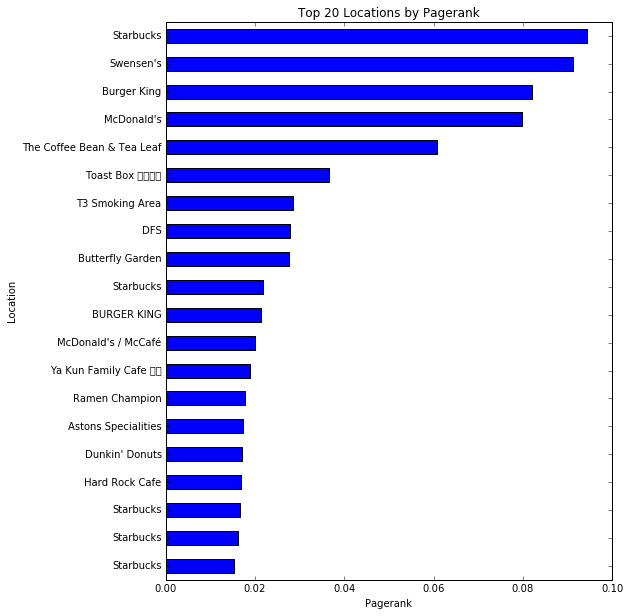

In [29]:
fig = plt.figure(figsize=(8, 10), dpi=150)
ax = fig.add_subplot(111)
venues.sort_values(by='pagerank', inplace=True)
venues.set_index('name')[-20:].pagerank.plot(kind='barh')
ax.set_ylabel('Location')
ax.set_xlabel('Pagerank')
ax.set_title('Top 20 Locations by Pagerank')
plt.show()

Betweenness centrality finds wide application in network theory: it represents the degree of which nodes stand between each other. For example, in a telecommunications network, a node with higher betweenness centrality would have more control over the network, because more information will pass through that node. Betweenness centrality was devised as a general measure of centrality it applies to a wide range of problems in network theory, including problems related to social networks, biology, transport and scientific cooperation.

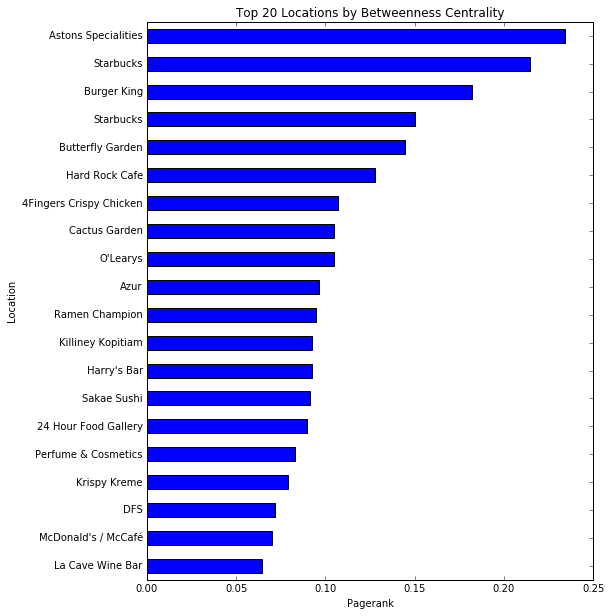

In [31]:
fig = plt.figure(figsize=(8, 10), dpi=150)
ax = fig.add_subplot(111)
venues.sort_values(by='betweenness', inplace=True)
venues.set_index('name')[-20:].betweenness.plot(kind='barh')
ax.set_ylabel('Location')
ax.set_xlabel('Pagerank')
ax.set_title('Top 20 Locations by Betweenness Centrality')
plt.show()

Visualizing our network

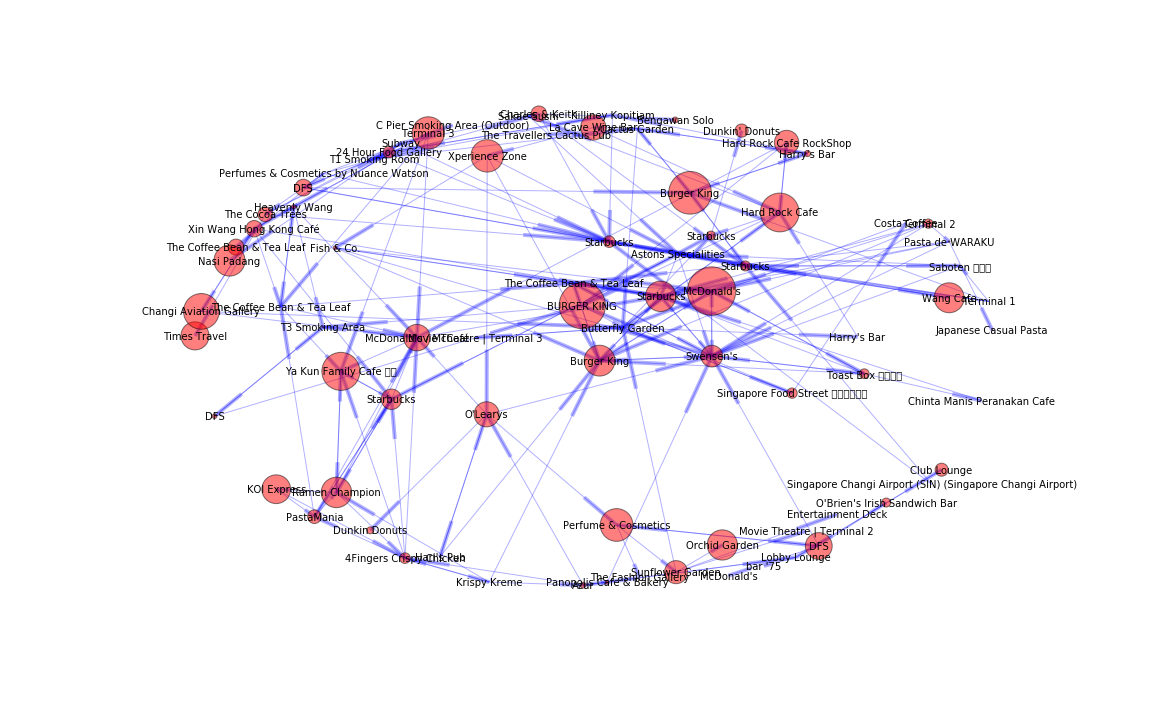

In [52]:
fig = plt.figure(figsize=(20, 12), dpi=150)
graph_pos=nx.spring_layout(G)
nodesize = [10000*n for n in betweenness.values()]
nx.draw_networkx_nodes(G,graph_pos,node_size=nodesize, alpha=0.5, node_color='red')
nx.draw_networkx_edges(G,graph_pos,width=1, alpha=0.3,edge_color='blue')
nx.draw_networkx_labels(G, graph_pos, labels=labels, font_size=10, font_family='Arial')
plt.axis('off')
plt.show()

## Notes:

4. Looks like people love drinking coffee and smoking at our airports
5. Butterfly garden is more popular than sunflower garden! (I personally like sunflowers) 
5. Besides food & beverages, spending time shopping at DFS is important according to pagerank
6. Fastfood joints are good common meeting spaces were most people traffic will intersect, as observed from the network graph above. When planning spaces , put them in the center of floor plans as they are also key people magnets (people attract people!)

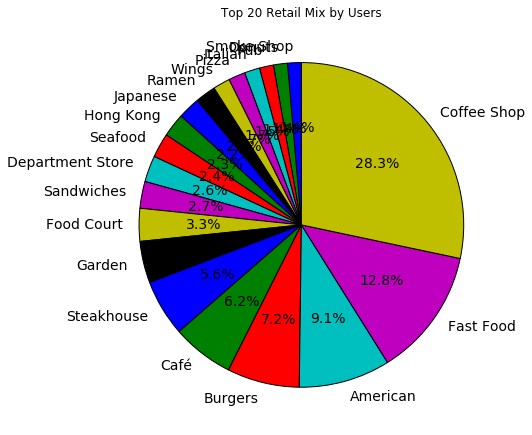

In [71]:
import numpy as np

pivot=pd.pivot_table(venues[venues['cat'].isin(filterlist)], values='users',columns=['cat'], aggfunc=np.sum).to_frame()
plt.figure(figsize=(16,10))
# plot chart
ax = plt.subplot(121, aspect='equal')
pivot.sort_values(by='users')[-20:].plot(kind='pie', y = 'users', ax=ax, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)
ax.set_title('Top 20 Retail Mix by Users')
plt.axis('off')
plt.show()